# PROJECT 4: Predict number of absenteeism hours

Team members:
* Chandini Karuturi (469991)
* Shivam Patil (471860)
* Sergio Cuauhtemoc Blancas Vargas (468971)

Human labor has always been a vital force to transform economy, it is the common factor that delivers value in every business and thus become the support of the value chain. However, employees with ineffective performance hinder this value delivery and therefore affect the company's ability to make a profit. While there are different reasons why an employee might be inefficient, absenteeism is a clear occurrence that precludes effective work. Understanding the underlying causes of absenteeism may help an organization to design policies, tools and programs to help reduce this occurrence.

The objective of this project is to predict absenteeism at work using machine learning models. For that purpose, we used a database with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil. This dataset depicts absence time as well as other variables (features) related to the cause of absence or the employee's personal information.

For this purpose we could use either regression or classification models, but we decided to use classification models. The motivation behind this will be discussed below when exploring the data.

## Data Analysis

In [31]:
#To begin, we import the required libraries and load the dataset.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Absenteeism_at_work.csv",  sep=';')

As mentioned before, the dataset was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.
These are the columns in our dataset and their meaning:

1. Individual identification (ID)
2. Reason for absence.

    Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI):

    * I - Certain infectious and parasitic diseases 
    * II - Neoplasms 
    * III - Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism 
    * IV - Endocrine, nutritional and metabolic diseases 
    * V - Mental and behavioral disorders 
    * VI - Diseases of the nervous system 
    * VII - Diseases of the eye and adnexa 
    * VIII - Diseases of the ear and mastoid process 
    * IX - Diseases of the circulatory system 
    * X - Diseases of the respiratory system 
    * XI - Diseases of the digestive system 
    * XII - Diseases of the skin and subcutaneous tissue 
    * XIII - Diseases of the musculoskeletal system and connective tissue 
    * XIV - Diseases of the genitourinary system 
    * XV - Pregnancy, childbirth and the puerperium 
    * XVI - Certain conditions originating in the perinatal period 
    * XVII - Congenital malformations, deformations and chromosomal abnormalities 
    * XVIII - Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified 
    * XIX - Injury, poisoning and certain other consequences of external causes 
    * XX - External causes of morbidity and mortality 
    * XXI - Factors influencing health status and contact with health services.

    And 7 categories without (ICD) 

    * 22 - patient follow-up 
    * 23 - medical consultation 
    * 24 - blood donation 
    * 25 - laboratory examination
    * 26 - unjustified absence 
    * 27 - physiotherapy
    * 28 - dental consultation
3. Month of absence
4. Day of the week {Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6)}
5. Seasons
6. Transportation expense
7. Distance from Residence to Work (in kilometers)
8. Service time
9. Age
10. Work load Average/day 
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education {high school (1), graduate (2), postgraduate (3), master and doctor (4)}
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pets)
18. Weight (in kilograms)
19. Height (in meters)
20. Body mass index
21. Absenteeism time in hours (target or prediction variable)

In [32]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


The table presented above displays the initial rows of the dataset along with their respective columns.

In [33]:
# For the purpose of operational efficiency and clarity, the column names are abbreviated to more concise versions.
data = data.rename(columns = {'Reason for absence':'Absence_Reason','Month of absence':'Absence_Month',
                     'Day of the week':'Absence_Day','Transportation expense': 'Transportation_Expense',
                     'Distance from Residence to Work':'Work_Distance','Service time':'Service_Time',
                     'Work load Average/day ':'Average_Workload','Hit target': 'Hit_Target',
                     'Disciplinary failure':'Disciplinary_Failure','Social drinker':'Drinker',
                     'Social smoker':'Smoker','Body mass index':'BMI','Absenteeism time in hours':'Absent_Hours'})

We start with a summary of the data entries:

In [34]:
# Create a summary list to store details about each column
bsDesc = [] 
for i in data.columns:
    bsDesc.append([
        i,
        data[i].dtypes,
        data[i].isna().sum(),   # Count of missing values in the column
        round((((data[i].isna().sum() )/ len(data)) * 100),2),  # Percentage of missing values
        data[i].count(),    # Number of non-null values
        data[i].nunique(),  # Number of unique values in the column
        data[i].drop_duplicates().sample(2).values  # Selects 2 unique sample values (or fewer if there are not 2 unique values)
    ])
pd.DataFrame(data = bsDesc,
            columns = [
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Count',
                'Unique',
                'Unique Sample'
            ])

,Features,DataType,Null,NullPercentage,Count,Unique,Unique Sample
0,ID,int64,0,0.0,740,36,"[9, 26]"
1,Absence_Reason,int64,0,0.0,740,28,"[23, 28]"
2,Absence_Month,int64,0,0.0,740,13,"[0, 10]"
3,Absence_Day,int64,0,0.0,740,5,"[4, 2]"
4,Seasons,int64,0,0.0,740,4,"[1, 2]"
5,Transportation_Expense,int64,0,0.0,740,24,"[179, 260]"
6,Work_Distance,int64,0,0.0,740,25,"[26, 49]"
7,Service_Time,int64,0,0.0,740,18,"[16, 4]"
8,Age,int64,0,0.0,740,22,"[27, 50]"
9,Average_Workload,float64,0,0.0,740,38,"[251.818, 237.656]"


The table presented provides an overview of the dataset, which consists of 740 records with no missing values. The 'Unique' column indicates the number of distinct values for each feature. In the subsequent analysis, certain features will be treated as categorical variables, while others will be considered numerical.

This dataset consists of 740 observations and 21 features with:

* 8 Categorical features: Reason for absence, Month of Absence, Day of the week, Seasons, Disciplinary failure, Education, Social drinker and Social smoker.

* 13 numerical features: ID, Transportation Expense, Distance from Residence to Work, Service time, Age, Workload, Hit target, Son, Pet, Weight, Height, Body mass index and Absenteeism time in hours.

Next, we will examine the dataset for anomalous values, such as fractional values in features expected to contain only integers, unexpected integer values in binary features, and other inconsistencies that may affect the analysis.

In [35]:
data.describe()

,ID,Absence_Reason,Absence_Month,Absence_Day,Seasons,Transportation_Expense,Work_Distance,Service_Time,Age,Average_Workload,...,Disciplinary_Failure,Education,Son,Drinker,Smoker,Pet,Weight,Height,BMI,Absent_Hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


We observe the presence of invalid zero values in the **Absence_Reason**, **Absence_Month**, and **Absence_Hours** columns. To assess the extent of this issue, we will determine the number of records containing these invalid values.

In [36]:
print(f"Count of records with Absence_Reason, Absence_Month or Absence_Hours being 0: {data["ID"][(data.Absence_Month == 0) | (data.Absence_Reason == 0) | (data.Absent_Hours == 0)].count()}")

Count of records with Absence_Reason, Absence_Month or Absence_Hours being 0: 44


There are only 44 records containing invalid values, which constitute approximately 6% of the dataset. Given the relatively small proportion of affected records, we can proceed with their removal to maintain data quality.

In [37]:
data = data[(data.Absent_Hours > 0)] # Remove records where 'Absent_Hours' is 0, as these are considered invalid
data = data[(pd.notnull(data.Absence_Month)) & ~(data.Absence_Month == 0)] # Remove records where 'Absence_Month' is either null or 0, as these are invalid values
data = data[(pd.notnull(data.Absence_Reason)) & ~(data.Absence_Reason == 0)] # Remove records where 'Absence_Reason' is either null or 0, as these are invalid values

data.describe()

,ID,Absence_Reason,Absence_Month,Absence_Day,Seasons,Transportation_Expense,Work_Distance,Service_Time,Age,Average_Workload,...,Disciplinary_Failure,Education,Son,Drinker,Smoker,Pet,Weight,Height,BMI,Absent_Hours
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,...,696.0,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,17.992816,20.392241,6.270115,3.920977,2.507184,219.916667,29.853448,12.553161,36.254310,271.165718,...,0.0,1.303161,1.000000,0.561782,0.066092,0.728448,78.751437,172.132184,26.573276,7.362069
std,10.974723,7.162846,3.434321,1.430728,1.105880,65.803295,14.855615,4.440175,6.380725,39.096003,...,0.0,0.685967,1.098069,0.496525,0.248621,1.281679,12.730748,6.087118,4.192879,13.628618
min,1.000000,1.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,1.000000
25%,10.000000,14.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,243.659250,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,2.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,80.000000,170.000000,25.000000,3.000000
75%,28.000000,27.000000,9.000000,5.000000,3.250000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.0,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,0.0,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Now we have 696 records. With this change we can see that Disciplinary_Failure has only 0 values, thus we can delete the column.

In [38]:
data = data.drop('Disciplinary_Failure', axis=1)

data.describe()

,ID,Absence_Reason,Absence_Month,Absence_Day,Seasons,Transportation_Expense,Work_Distance,Service_Time,Age,Average_Workload,Hit_Target,Education,Son,Drinker,Smoker,Pet,Weight,Height,BMI,Absent_Hours
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,17.992816,20.392241,6.270115,3.920977,2.507184,219.916667,29.853448,12.553161,36.254310,271.165718,94.719828,1.303161,1.000000,0.561782,0.066092,0.728448,78.751437,172.132184,26.573276,7.362069
std,10.974723,7.162846,3.434321,1.430728,1.105880,65.803295,14.855615,4.440175,6.380725,39.096003,3.656150,0.685967,1.098069,0.496525,0.248621,1.281679,12.730748,6.087118,4.192879,13.628618
min,1.000000,1.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,1.000000
25%,10.000000,14.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,243.659250,93.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,2.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,80.000000,170.000000,25.000000,3.000000
75%,28.000000,27.000000,9.000000,5.000000,3.250000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


With the dataset now cleaned and structured appropriately, we can proceed with transforming the columns into their proper data types.

In [39]:
# Define categorical columns that represent discrete values
categorical = ['ID','Absence_Reason','Absence_Month','Absence_Day','Seasons','Education','Drinker','Smoker']   

# Define continuous (numerical) columns that represent measurable quantities
continuous = ['Transportation_Expense','Work_Distance','Service_Time','Age','Average_Workload','Hit_Target','Son','Pet', 
             'Weight','Height','BMI','Absent_Hours']

# Convert categorical columns to the "category" data type for efficient processing
for i in categorical:
    data[i] = data[i].astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 696 entries, 0 to 736
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ID                      696 non-null    category
 1   Absence_Reason          696 non-null    category
 2   Absence_Month           696 non-null    category
 3   Absence_Day             696 non-null    category
 4   Seasons                 696 non-null    category
 5   Transportation_Expense  696 non-null    int64   
 6   Work_Distance           696 non-null    int64   
 7   Service_Time            696 non-null    int64   
 8   Age                     696 non-null    int64   
 9   Average_Workload        696 non-null    float64 
 10  Hit_Target              696 non-null    int64   
 11  Education               696 non-null    category
 12  Son                     696 non-null    int64   
 13  Drinker                 696 non-null    category
 14  Smoker                  696 non

Next, we will generate visualizations to gain deeper insights into the dataset, facilitating a better understanding of its distributions, relationships, and key characteristics.

<Axes: >

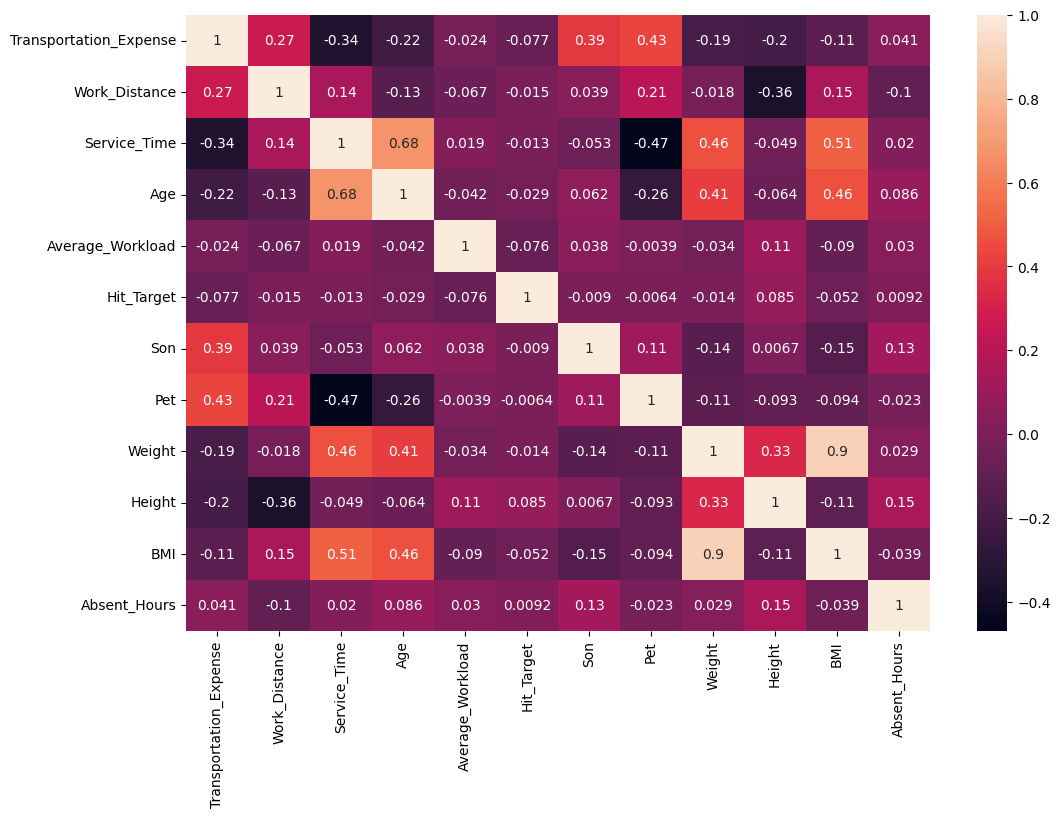

In [40]:
# Compute the correlation matrix for continuous numerical variables
corr=data[continuous].corr()
# Create a figure and axis for the heatmap with a specified size
f,ax=plt.subplots(figsize=(12,8))
# Generate a heatmap to visualize correlations between numerical features
# 'annot=True' displays correlation values inside the heatmap cells
sns.heatmap(corr,annot=True) 

Based on the correlation matrix, it is observed that Age and Service_Time exhibit a high degree of correlation, as do BMI and Weight. This finding is intuitive, as individuals tend to gain more experience with age, and BMI is directly derived from weight and height. Apart from these features, no other significant correlations are present within the dataset. Especially, none of the features show a high correlation with the target variable: Absent_Hours.

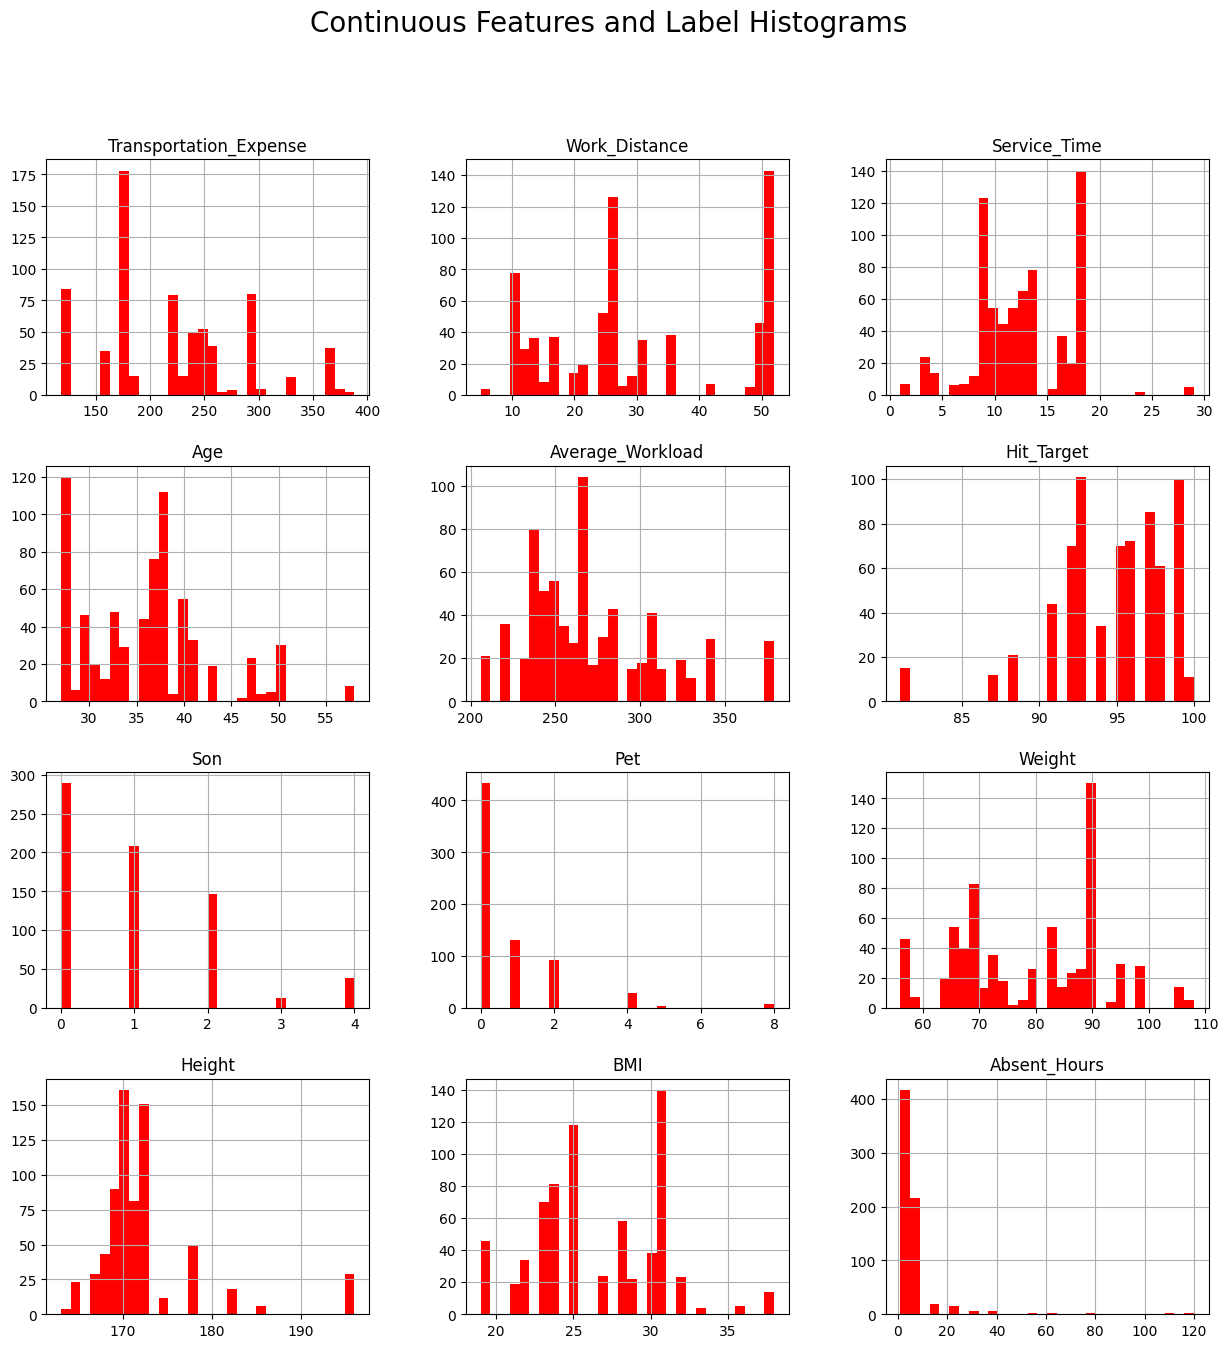

In [41]:
data.hist(bins = 30, figsize = (15,15), color = 'r')
plt.suptitle('Continuous Features and Label Histograms', fontsize=20)
plt.show()

The histograms above illustrate the distribution of various features in the dataset. Certain features, such as Transportation_Expense and Weight, exhibit relatively well-balanced distributions, indicating a more uniform spread of values. However, other features, such as Pet and Absent_Hours, display noticeable skewness. This skewness could potentially pose a challenge, particularly with regard to the label, Absent_Hours. 

Text(0.5, 0.98, 'Absent_Hours Boxplot')

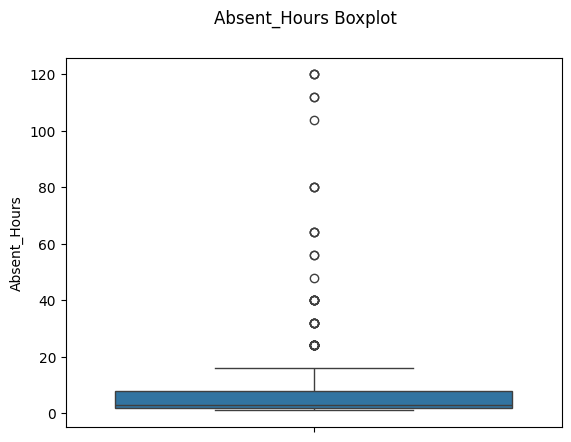

In [42]:
sns.boxplot(data['Absent_Hours'])
plt.suptitle('Absent_Hours Boxplot')

In the above boxplot we can see more clearly these outliers. Outliers can impact model performance and interpretation. When the target variable is skewed, the model can become biased toward the majority class, meaning that it will have a tendency to predict the majority class more often. In addition, evaluation metrics like R-squared (for regression) or accuracy (for classification) may be misleading because the model performs well for the majority but not on rare cases.

#### Regression vs Classification
The concept of "balance" in regression refers to ensuring that the target variable's values are evenly distributed across its range, rather than focusing on class frequencies as in classification. Skewed distributions can lead to biased predictions, where the model performs well on the majority of data but poorly on rare or extreme cases.

In regression, models like linear regression minimize errors (e.g., Mean Squared Error), but if data points are clustered in a specific range, the model becomes biased towards that range. This can make evaluation metrics like R-squared or RMSE misleadingly good, even though the model fails on outliers.

While unbalanced classes in classification can be managed by resampling, unbalanced data in regression requires careful handling. Given the characteristics of the data, classification models are better suited for this project, as they can more effectively manage skewed distributions and handle rare cases.

Considering the points previously discussed, we divide the Absent_Hours in 2 classes:
* Moderately Absent: when the record has 3 hours or less of absenteeism.
* Excessively Absent: when the record has more than 3 hours of absenteeism.

By setting the threshold at 3 hours, we ensure that both classes have a similar number of records, addressing the imbalance and allowing for better performance of classification models.

In [ ]:
# Apply a transformation to the 'Absent_Hours' column:
# If the value of 'Absent_Hours' is greater than 3, set it to 1 (Excessively Absent) otherwise, set it to 0 (Moderately Absent)
data['Absent_Hours'] = data['Absent_Hours'].apply( lambda x: 1 if x > 3 else 0)
# Create two separate datasets based on the transformed 'Absent_Hours' values
# 'Moderately_Absent' includes all records where 'Absent_Hours' is 0 (<= 3 hours)
Moderately_Absent = data[data['Absent_Hours'] == 0]
# 'Excessively_Absent' includes all records where 'Absent_Hours' is 1 (> 3 hours)
Excessively_Absent = data[data['Absent_Hours'] == 1]
     
print(f'Total Employee count = {len(data)}')
print(f'Employees who Moderately Absent = {len(Moderately_Absent)/len(data)*100:.2f}%')
print(f'Employees who Excessively Absent = {len(Excessively_Absent)/len(data)*100:.2f}%')

data.head()

Total Employee count = 696
Employees who Moderately Absent = 51.29%
Employees who Excessively Absent = 48.71%


,ID,Absence_Reason,Absence_Month,Absence_Day,Seasons,Transportation_Expense,Work_Distance,Service_Time,Age,Average_Workload,Hit_Target,Education,Son,Drinker,Smoker,Pet,Weight,Height,BMI,Absent_Hours
0,11,26,7,3,1,289,36,13,33,239.554,97,1,2,1,0,1,90,172,30,1
2,3,23,7,4,1,179,51,18,38,239.554,97,1,0,1,0,0,89,170,31,0
3,7,7,7,5,1,279,5,14,39,239.554,97,1,2,1,1,0,68,168,24,1
4,11,23,7,5,1,289,36,13,33,239.554,97,1,2,1,0,1,90,172,30,0
5,3,23,7,6,1,179,51,18,38,239.554,97,1,0,1,0,0,89,170,31,0


Text(0.5, 0.98, 'Absent_Hours class distribution')

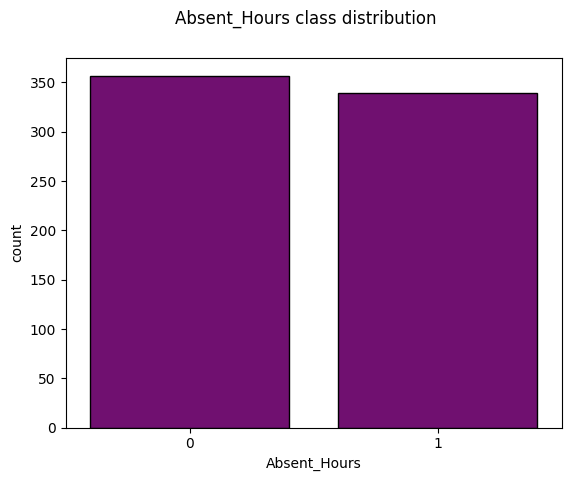

In [44]:
sns.countplot(data = data, x='Absent_Hours', color = 'purple', edgecolor='black')
plt.suptitle('Absent_Hours class distribution')

At this stage, we can observe the balance between the classes. The distribution of employees between the "Moderately Absent" and "Excessively Absent" categories is now clear, and the classes appear to be well-balanced, which is crucial for training classification models effectively.

Next, we aim to identify high leverage points in the dataset. High leverage points are observations that have extreme values or unusual positions in the feature space, which can disproportionately influence the model’s predictions.

<Axes: ylabel='Hit_Target'>

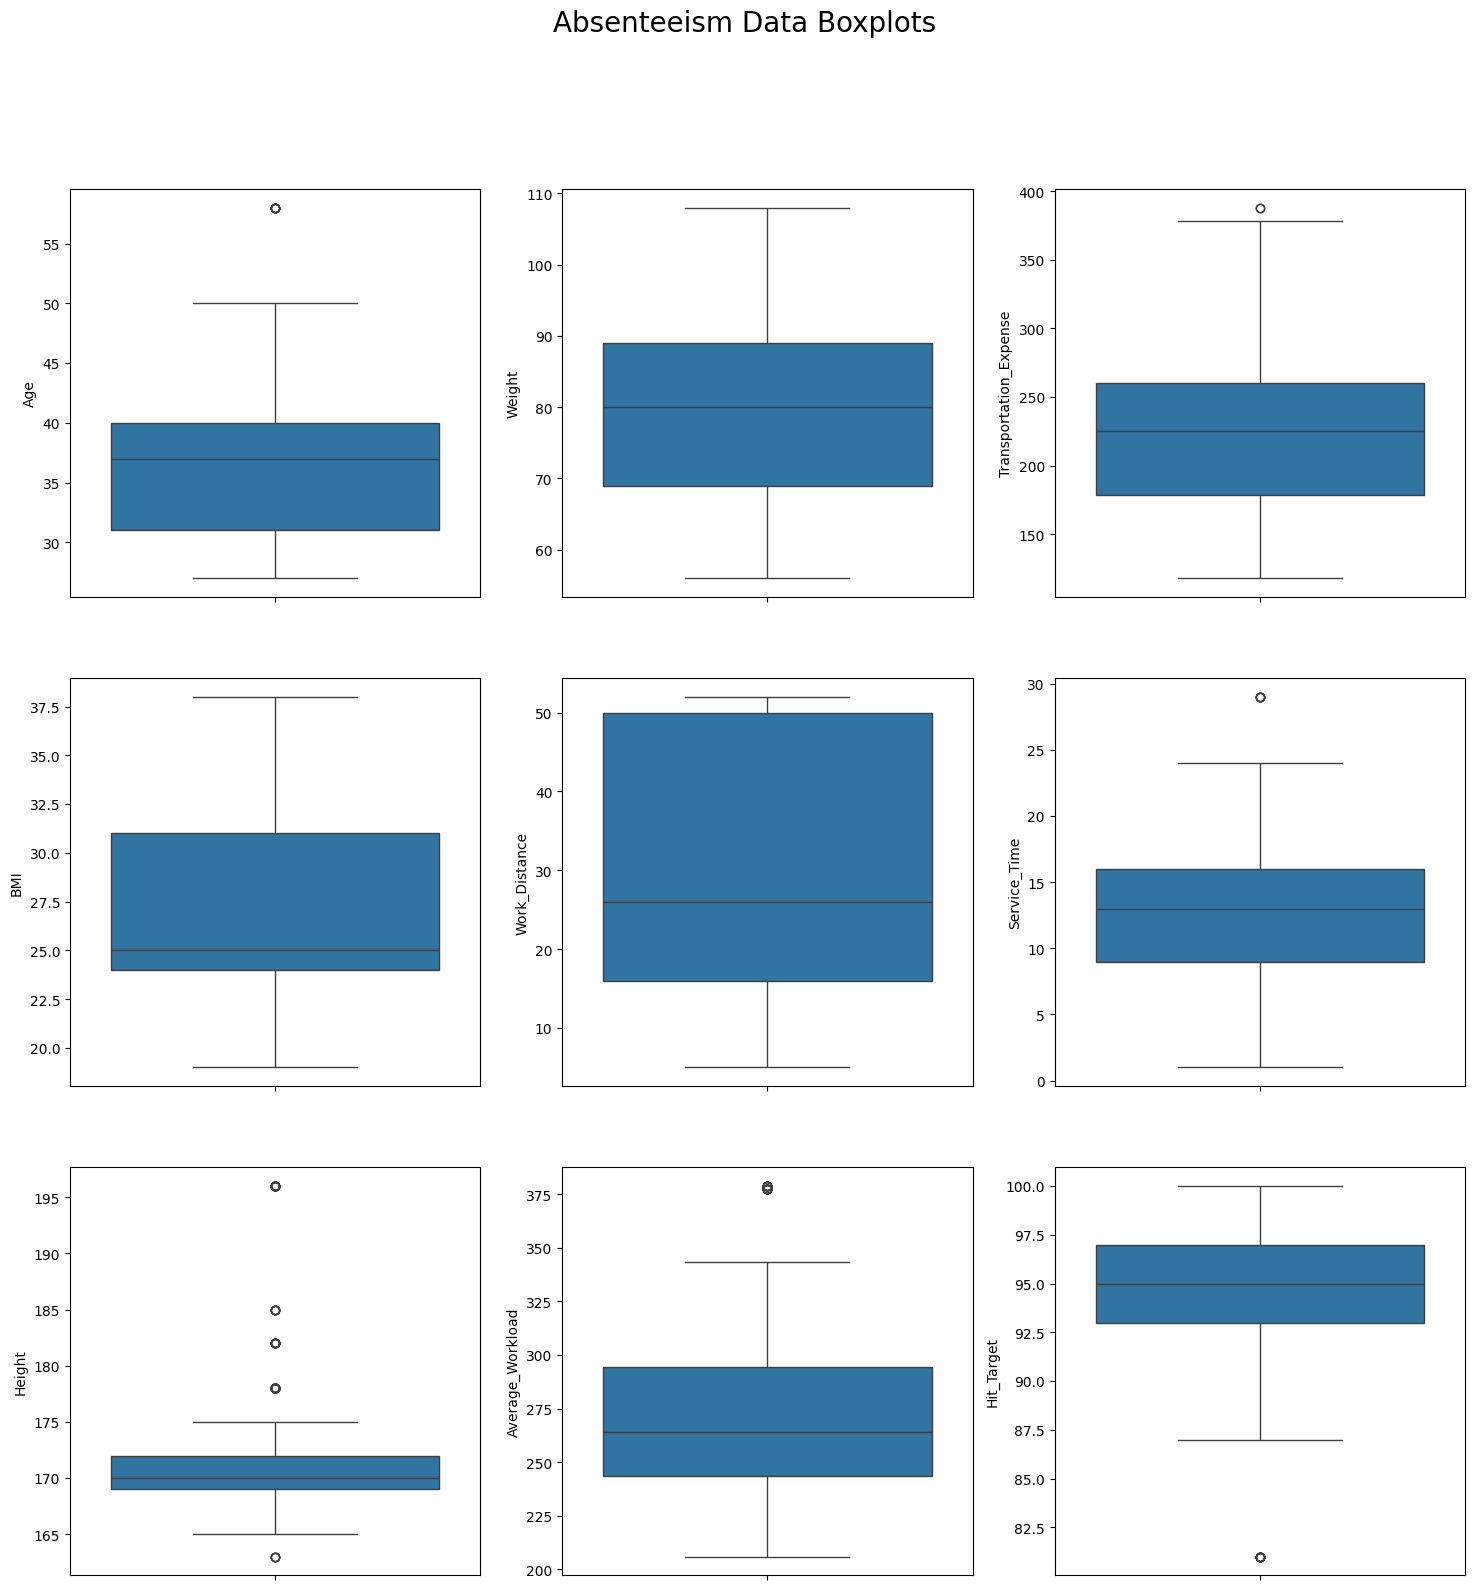

In [45]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('Absenteeism Data Boxplots', fontsize=20)

sns.boxplot(ax=axes[0, 0], data=data['Age'])
sns.boxplot(ax=axes[0, 1], data=data['Weight'])
sns.boxplot(ax=axes[0, 2], data=data['Transportation_Expense'])
sns.boxplot(ax=axes[1, 0], data=data['BMI'])
sns.boxplot(ax=axes[1, 1], data=data['Work_Distance'])
sns.boxplot(ax=axes[1, 2], data=data['Service_Time'])
sns.boxplot(ax=axes[2, 0], data=data['Height'])
sns.boxplot(ax=axes[2, 1], data=data['Average_Workload'])
sns.boxplot(ax=axes[2, 2], data=data['Hit_Target'])

From the boxplots, we can see: 
1. Data Distribution: shows how each feature is spread across its range of values.
2. Central Tendency: The median (middle line in the box) shows the typical value for each feature.
3. Variability: The size of the box and whiskers indicates the variability and spread of the data.
4. Outliers/high leverage points: Points outside the whiskers highlight unusual or extreme values in the dataset.
5. Skewness: The position of the median and whisker lengths show whether the data is skewed.

The number of high leverage points is minimal, so all data points are kept for analysis.

Now we want to see the distribution of Absence_Reason:

C:\Users\Sergio\AppData\Local\Temp\ipykernel_29476\3691726161.py:36: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_copy["Absence_Reason"] = pd.Categorical(data_copy["Absence_Reason"].replace(Reasons))


Text(0.5, 0, 'Count')

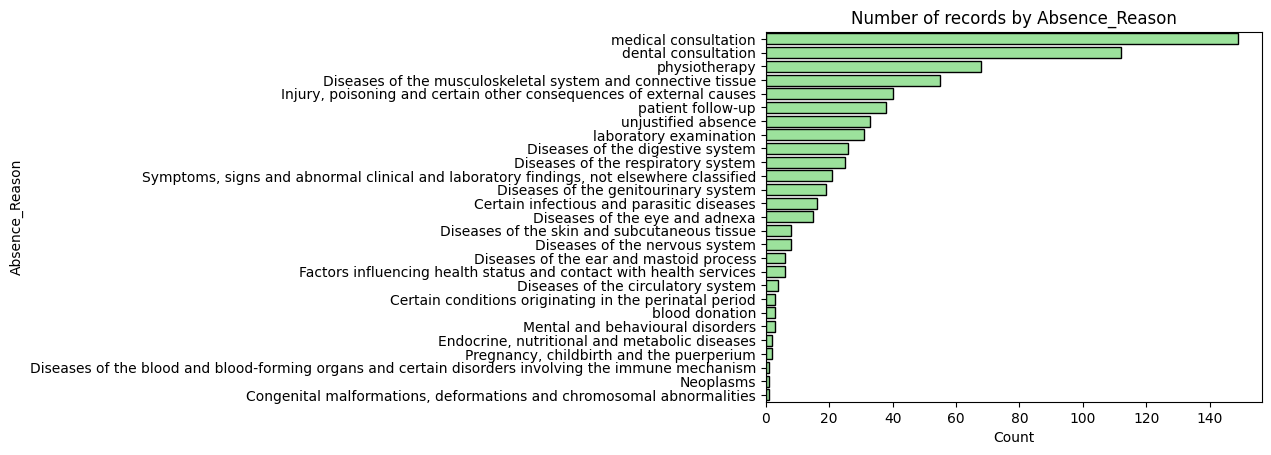

In [ ]:
Reasons={
    0: "No absence",
    1: "Certain infectious and parasitic diseases",
    2: "Neoplasms",
    3: "Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism",
    4: "Endocrine, nutritional and metabolic diseases",
    5: "Mental and behavioural disorders",
    6: "Diseases of the nervous system",
    7: "Diseases of the eye and adnexa",
    8: "Diseases of the ear and mastoid process",
    9: "Diseases of the circulatory system",
    10: "Diseases of the respiratory system",
    11: "Diseases of the digestive system",
    12: "Diseases of the skin and subcutaneous tissue",
    13: "Diseases of the musculoskeletal system and connective tissue",
    14: "Diseases of the genitourinary system",
    15: "Pregnancy, childbirth and the puerperium",
    16: "Certain conditions originating in the perinatal period",
    17: "Congenital malformations, deformations and chromosomal abnormalities",
    18: "Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",
    19: "Injury, poisoning and certain other consequences of external causes",
    20: "External causes of morbidity and mortality",
    21: "Factors influencing health status and contact with health services",
    22: "patient follow-up",
    23: "medical consultation",
    24: "blood donation",
    25: "laboratory examination",
    26: "unjustified absence",
    27: "physiotherapy",
    28: "dental consultation"
}

# Create a copy of the original dataset to avoid modifying the original data
data_copy=data.copy()
# Replace the 'Absence_Reason' column values with the corresponding categorical values from the 'Reasons' dictionary
data_copy["Absence_Reason"] = pd.Categorical(data_copy["Absence_Reason"].replace(Reasons))
# Create a countplot to visualize the number of records for each 'Absence_Reason'
# The 'y' axis represents 'Absence_Reason', and we use 'order' to sort the reasons by their frequency in descending order
sns.countplot(data = data_copy, y='Absence_Reason', order=data_copy['Absence_Reason'].value_counts().index, color = 'lightgreen', edgecolor='black')
plt.title("Number of records by Absence_Reason")
plt.xlabel("Count")

The top three reasons for absenteeism are medical consultation, dental consultation, and physiotherapy. This indicates that health-related issues are a significant factor. Just by looking at this, the company might consider implementing wellness policies or campaigns to improve employees health, both at work and outside, to help reduce absenteeism.

To handle the "Absence_Reason" feature, which has many different values, we plan to group the reasons into broader categories before encoding. The groups are as follows:
* Group 1: Reasons 1 to 14, related to various diseases.
* Group 2: Reasons 15 to 17, related to pregnancy and giving birth.
* Group 3: Reasons 18 to 21, related to poisoning or external factors.
* Group 4: Non-severe reasons for absence, such as dental appointments, physiotherapy, and medical consultations.

This grouping will simplify the feature and make it easier to encode.

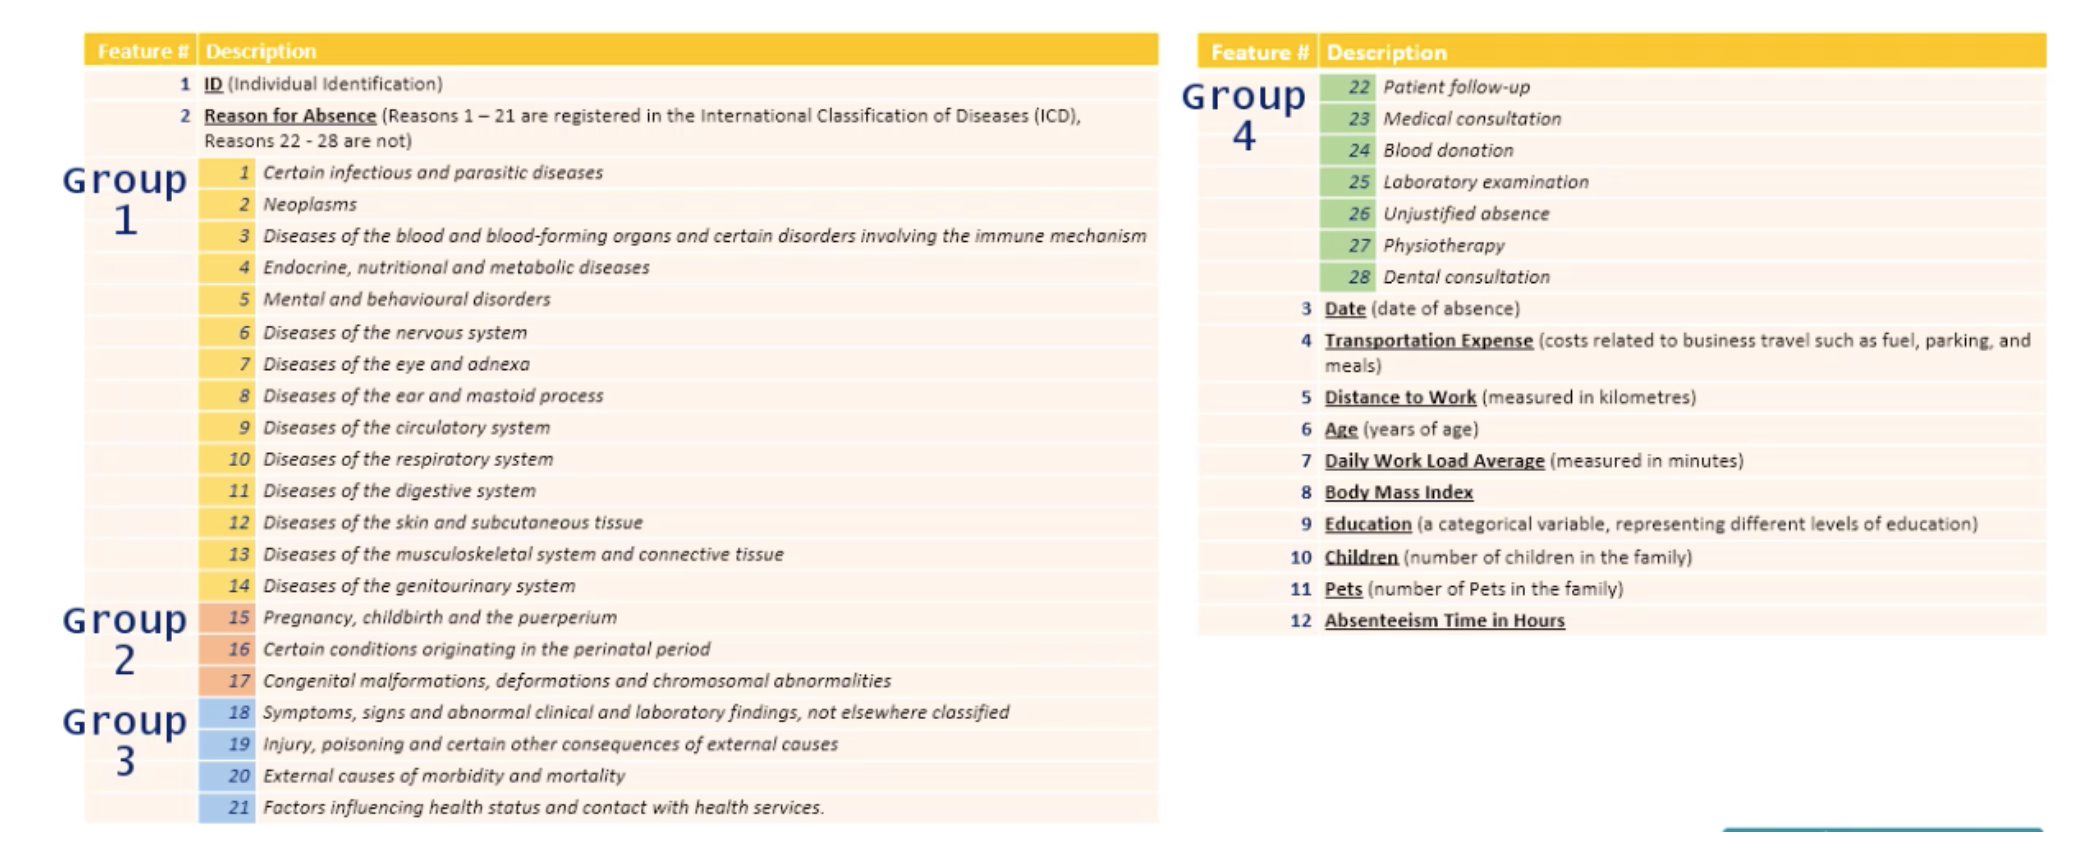

We are going to create a copy of original data, called "classified_data" in which we modify the Absence_Reason column to contain the groups we defined previously.

In [47]:
#We are going to call RA the first group, RB the second group, RC the third group and RD the fourth group.
Re={
    1: "RA", 2: "RA", 3: "RA", 4: "RA", 5: "RA", 6: "RA", 7: "RA", 8: "RA", 9: "RA", 10: "RA", 11: "RA", 12: "RA", 13: "RA", 14: "RA",
    15: "RB", 16: "RB", 17: "RB",
    18: "RC", 19: "RC", 20: "RC", 21: "RC",
    22: "RD", 23: "RD", 24: "RD", 25: "RD", 26: "RD", 27: "RD", 28: "RD"
}

classified_data= data.copy()
classified_data["Absence_Reason"] = pd.Categorical(classified_data["Absence_Reason"].replace(Re))

C:\Users\Sergio\AppData\Local\Temp\ipykernel_29476\1932863019.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  classified_data["Absence_Reason"] = pd.Categorical(classified_data["Absence_Reason"].replace(Re))


In [48]:
classified_data.head()

,ID,Absence_Reason,Absence_Month,Absence_Day,Seasons,Transportation_Expense,Work_Distance,Service_Time,Age,Average_Workload,Hit_Target,Education,Son,Drinker,Smoker,Pet,Weight,Height,BMI,Absent_Hours
0,11,RD,7,3,1,289,36,13,33,239.554,97,1,2,1,0,1,90,172,30,1
2,3,RD,7,4,1,179,51,18,38,239.554,97,1,0,1,0,0,89,170,31,0
3,7,RA,7,5,1,279,5,14,39,239.554,97,1,2,1,1,0,68,168,24,1
4,11,RD,7,5,1,289,36,13,33,239.554,97,1,2,1,0,1,90,172,30,0
5,3,RD,7,6,1,179,51,18,38,239.554,97,1,0,1,0,0,89,170,31,0


Here we can see the groups in Absence_Reason column.

## Modeling

For the modeling part, we are defining what the categorical and numerical (continuous) features are. Furthermore, we are excluding ID from features since it is only an employee identification.

In [ ]:
import numpy as np

categorical_features = ['Absence_Reason','Absence_Month','Absence_Day','Seasons','Education','Drinker','Smoker']
numerical_features = ['Transportation_Expense','Work_Distance','Service_Time','Age','Average_Workload','Hit_Target','Son','Pet',
             'Weight','Height','BMI']
label = ['Absent_Hours']

# Combine both categorical and numerical features into one list for convenience
features = categorical_features + numerical_features

# Separate the data into features (X) and label (Y)
X = classified_data[features] # X contains the feature data
Y = np.ravel(classified_data[label]) # Y contains the label data (ravel converts Y into a 1D array from a column vector)

We are using Nested K-Fold for cross validation due to the following reasons:
* The nested structure ensures that data used for tuning is kept separate from data used for final model evaluation, reducing the risk of data leakage.
* The structure also ensures that we can understand how well the model generalizes to unseen data, resulting in a more reliable estimate of the model's true performance.
* The inner K-Fold cross validation provides an intermediate level of bias (compared to Hold-out or Leave-one-out approaches) while avoiding overfitting. This is true because the model is validated on different subsets of data that provide less correlated outputs (compared to Leave-one-out approach).


We now define the number of folds and the size of the test set. We decided to use 5 folds so the process does not take many computational resources, but we set the train size to 80% of the data so we have a substantial set that we can use to train the models.

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import make_pipeline

kfold=KFold(n_splits=5, shuffle=True, random_state=42) # K-Fold cross validation on the inside

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42) # Hold out validation on the outside
# We decided to use random_state = 42 on different instances in the project for reproducibility
X_train.shape,Y_train.shape

((556, 18), (556,))

We decided to use Logistic Regression, Support Vector Classifiers (SVC) and Support Vector Machine (SVM). Each one has its advantages that made us consider them for this classification task:

Logistic Regression
* Logistic Regression is efficient and simple to implement.
* Outputs probability estimates (probability that a given instance belongs to a certain class), which can be modified depending on type of application and severity of decisions needed.

Support Vector Classifier (SVC)
* SVC can avoid overfitting, especially in high-dimensional feature spaces.
* It finds the hyperplane that maximizes the margin between classes, leading to better generalization on unseen data.

Support Vector Machine (SVM)
* SVM allows the use of different kernel functions, providing flexibility to model complex relationships between features.
* High generalization performance due to the margin maximization, leading to more accurate predictions on new data and being less sensitive to outliers.

## Model 1: Logistic Regression

#### Feature Selection:
  - The first step we are taking in Logistic Regression (as well as in the other models) is perform Feature Selection. We want to decrease the number of features in order to improve the model interpretability and accuracy by reducing the variance.
  - We are choosing **Forward Stepwise Feature Selection**, which can be considered an heuristic method, for the following reasons:
    * We do not want to consume much computational resources by using an exact method.
    * We have 696 observations and 18 features, this means we have more observations than features, but since we are going to use One-Hot Encoding we want to stay on the safe side.
  - In this section we have defined a function with the Logistic Regression function, here we use a pipeline to encode categorical features using **One-Hot Encoding** since we do not have natural order. We also standardize numerical values using **StandardScaler** to provide more numerical stability.
 - We will cross validate the model using K-Fold of 5 folds and accuracy as the selection metric of the best model. We decided to use accuracy because we have a balanced data set, so it will work well on our data.
  - In order to perform feature selection, we will use the standard threshold of 0.5, this is a hyperparameter that we are going to modify when performing hyperparameter tuning.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

def get_model(features):
    categorical_f = []
    numerical_f = []

    # Separate the features into categorical and numerical based on predefined lists
    for feature in features:
        for cat_feature in categorical_features:
            if feature == cat_feature:
                categorical_f.append(feature)
        
        for num_feature in numerical_features:
            if feature == num_feature:
                numerical_f.append(feature)

    return make_pipeline(
        ColumnTransformer(transformers=[
            ('categorical', OneHotEncoder(), categorical_f), # We use One-hot encoding for categorical features
            ('numerical', StandardScaler(), numerical_f) # We standardize numerical values
        ]),
        LogisticRegression(random_state=42))

class Solution:
    features = list()
    acc = 0.0
    
    def __init__(self, y):
        pred = [1] * len(y)  # Naive prediction of everything being 1
        self.acc = accuracy_score(y, pred)
    
    def update(self, features, acc):  # If the new accuracy is better than the current one, update the features and accuracy
        if acc > self.acc:
            self.features = features
            self.acc = acc
            return True
        return False

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

all_features = list(features)
current_features = list()
best = Solution(Y) # Initialize solution

while current_features != all_features:
    selected_feature = None
    
    for feature in set(all_features) - set(current_features):
        new_features = current_features + [feature]
        acc_scores = cross_val_score(
            estimator=get_model(new_features),
            X=X_train[new_features], y=Y_train, 
            cv=kfold, scoring='accuracy')
        avg_acc = np.mean(acc_scores)

        if best.update(new_features, avg_acc):   # Update the best solution if the new accuracy is better
            selected_feature = feature      
    if selected_feature:        # If a better feature was found, add it to the selected list
        current_features.append(selected_feature)
    else:
        break

best_features_logistic = best.features

print('Selected features: ', end='')
print(', '.join(best_features_logistic))
print(f'Accuracy score: {round(avg_acc,4)}')

Selected features: Absence_Reason, Transportation_Expense, Weight, Work_Distance
Accuracy score: 0.7374


Now that we have a subset of features to use specifically in Logistic Regression, we need to define again what the categorical and numerical features are.

In [52]:
categorical_features_log = []
numerical_features_log = []

for feature in best_features_logistic:
    for cat_feature in categorical_features:
        if feature == cat_feature:
            categorical_features_log.append(feature)
    for num_feature in numerical_features:
        if feature == num_feature:
            numerical_features_log.append(feature)

#### Hyperparameter Tuning:
  - The output of Logistic Regression is a probability of the observation belonging to positive (0) or negative class (1). The threshold defines this class based on the probability. If the threshold is 0.5, it means that any probability equal or greater than 0.5 will be classified as negative class.
  - We want to see if using different thresholds improves accuracy. We are going to test 9 thresholds (from 0.1 to 0.9), cross validated using k-fold. This would correspond to the inner cross validation of the Nested K-Fold cross validation.
  - The threshold with the highest accuracy is selected as the best threshold, and used for the model training.

In [ ]:
# Threshold tuning
from sklearn.metrics import make_scorer, accuracy_score

log_model = make_pipeline(
    ColumnTransformer(transformers=[
            ('categorical', OneHotEncoder(), categorical_features_log),
            ('numerical', StandardScaler(), numerical_features_log)
            ]),
    LogisticRegression(random_state=42))

# We define an custom threshold accuracy function
def threshold_accuracy(y_true, y_pred_proba, threshold):
    y_pred=[]
    for element in y_pred_proba:
        if element >= threshold: # If predicted probability is greater than or equal to the threshold, the predicted class is set to 1; otherwise, it is set to 0.
            y_pred.append(1)
        else:
            y_pred.append(0)

    return accuracy_score(y_true, y_pred)

thresholds = np.linspace(0.1, 0.9, 9) # Define thresholds to evaluate
best_score = 0
best_threshold = 0

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over each threshold and compute cross validated accuracy
for threshold in thresholds:
    # We define a custom scorer which utilizes the threshold_accuracy function with the current threshold.
    scorer = make_scorer(threshold_accuracy, greater_is_better=True, response_method="predict_proba", threshold=threshold)
    # Evaluate the model using cross validation with the custom scorer
    scores = cross_val_score(
            estimator=log_model, 
            X=X_train[best_features_logistic], y=Y_train, 
            cv=kfold, scoring=scorer)
    mean_score = np.mean(scores)
    
    if mean_score > best_score:
        best_score = mean_score
        best_threshold = threshold

print(f'Best threshold: {best_threshold}')
print(f'Best cross-validated accuracy score: {round(best_score,4)}')

Best threshold: 0.5
Best cross-validated accuracy score: 0.7554


#### Final Model Training:
  - Interestingly, we obtained that the best threshold is actually the standard threshold of 0.5, now we need to retrain the model using the complete train set with the **best feature set** and the **best threshold**.
  -  After that step, we need to calculate metrics using the test set, so we can compare with other models.

In [ ]:
# Retrain the Logistic Regression model using the best features
log_model.fit(X_train[best_features_logistic], Y_train)

# Use test set to calculate accuracy, we consider the threshold of 0.5
logistic_results=[]
for obs in log_model.predict_proba(X_test[best_features_logistic]):
    if (obs[0]>=best_threshold):  # Apply the best threshold
        logistic_results.append(0)  # Class 0
    else:
        logistic_results.append(1)  # Class 1


#### Confusion matrix and Classification report (Logistic Regression)

Accuracy Score: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.91      0.78        68
           1       0.88      0.60      0.71        72

    accuracy                           0.75       140
   macro avg       0.78      0.75      0.75       140
weighted avg       0.78      0.75      0.74       140


Confusion Matrix:
[[62  6]
 [29 43]]


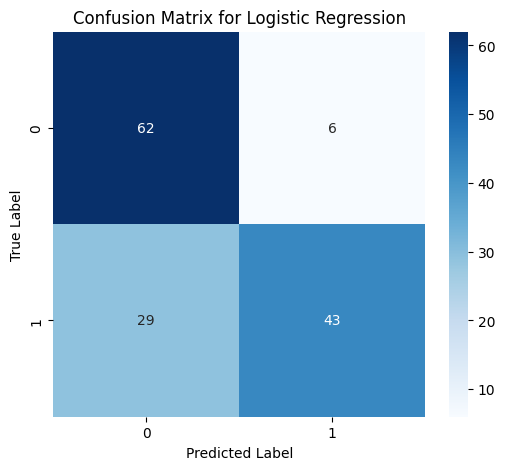

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate and print the accuracy score
print(f"Accuracy Score: {round(accuracy_score(Y_test, logistic_results), 4)}")

# Generate the classification report
print("\nClassification Report:")
print(classification_report(Y_test, logistic_results))

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, logistic_results)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

#### **Classification Report**:
- **Class 0**:
  - **Precision**: 0.68 (68% of predicted Class 0 instances are correct)
  - **Recall**: 0.91 (91% of actual Class 0 instances are correctly predicted)
  - **F1-Score**: 0.78 (balanced measure of precision and recall)
- **Class 1**:
  - **Precision**: 0.88 (88% of predicted Class 1 instances are correct)
  - **Recall**: 0.60 (60% of actual Class 1 instances are correctly predicted)
  - **F1-Score**: 0.71 (balanced measure of precision and recall)
- **Overall Accuracy**: 0.75 (75% of all predictions are correct)

#### **Confusion Matrix**:
For this model we define class 0 as positive and class 1 as negative:
- **True Positives (TP)**: 62 (Class 0 correctly predicted)
- **True Negatives (TN)**: 43 (Class 1 correctly predicted)
- **False Positives (FP)**: 29 (Class 1 incorrectly predicted as Class 0)
- **False Negatives (FN)**: 6 (Class 0 incorrectly predicted as Class 1)


## Model 2: Support Vector Classifier (SVC)


In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC

# Define categorical and numerical features
categorical_features = ['Absence_Reason', 'Absence_Month', 'Absence_Day', 'Seasons', 'Education', 'Drinker', 'Smoker']
numerical_features = ['Transportation_Expense', 'Work_Distance', 'Service_Time', 'Age', 'Average_Workload', 
                      'Hit_Target', 'Son', 'Pet', 'Weight', 'Height', 'BMI']

# Function to create an SVM pipeline with preprocessing
def get_model(features, C_value, kernel_type):
    categorical_f = [f for f in features if f in categorical_features]
    numerical_f = [f for f in features if f in numerical_features]
    
    return make_pipeline(
        ColumnTransformer(transformers=[
            ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_f),
            ('numerical', StandardScaler(), numerical_f)
        ]),
        SVC(C=C_value, kernel=kernel_type, random_state=42)
    )

# Initialize cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
class Solution:
    def __init__(self, y):
        pred = np.ones(len(y)) 
        self.accuracy = accuracy_score(y, pred)
        self.features = []

    def update(self, features, accuracy):
        if accuracy > self.accuracy:
            self.features = features.copy()
            self.accuracy = accuracy
            return True
        return False

# Feature selection
all_features = categorical_features + numerical_features
current_features = []
best = Solution(Y)  # Initialize the solution with the initial naive accuracy

while set(current_features) != set(all_features):
    selected_feature = None

    for feature in set(all_features) - set(current_features):
        new_features = current_features + [feature]

        # Train model and evaluate accuracy score using cross-validation
        model = get_model(new_features, 100, 'linear')  # Use linear kernel and C=100 for this iteration
        accuracy_scores = cross_val_score(model, X_train[new_features], Y_train, cv=kfold, scoring='accuracy')
        avg_accuracy = np.mean(accuracy_scores)

        if best.update(new_features, avg_accuracy):
            selected_feature = feature
    if selected_feature:
        current_features.append(selected_feature)
    else:
        break

print(f'\nSelected Features: {best.features}')
print(f'Best Accuracy: {best.accuracy:.4f}')

# Train final SVC on best features on Linear Kernel
features = best.features
results = {}

kernels = ['linear'] # Define the list of kernels to test
C_values = [0.1, 1, 10, 100] # Define a range of C values to test

# Iterate through all combinations of kernels and C values
for kernel in kernels:
    for C_value in C_values:    
        model = get_model(features, C_value, kernel)
        
        # Perform cross-validation on the training set
        scores = cross_val_score(model, X_train[features], Y_train, cv=kfold, scoring='accuracy')
        results[(kernel, C_value)] = scores.mean()
        print(f'Model accuracy with kernel={kernel}, C={C_value}: {scores.mean():.4f}')

# Find the best combination of kernel and C value based on the highest accuracy
best_kernel, best_C = max(results, key=results.get)
print(f'\nBest combination: kernel={best_kernel}, C={best_C} with accuracy: {results[(best_kernel, best_C)]:.4f}')

# Train final SVM model with best features & hyperparameters
final_model = get_model(features, C_value=best_C, kernel_type=best_kernel)
final_model.fit(X_train[features], Y_train)

y_final_pred = final_model.predict(X_test[features])
final_accuracy = accuracy_score(Y_test, y_final_pred)
print(f'\nFinal Model Accuracy: {final_accuracy:.4f}')



Selected Features: ['Absence_Reason']
Best Accuracy: 0.6888
Model accuracy with kernel=linear, C=0.1: 0.6906
Model accuracy with kernel=linear, C=1: 0.6888
Model accuracy with kernel=linear, C=10: 0.6888
Model accuracy with kernel=linear, C=100: 0.6888

Best combination: kernel=linear, C=0.1 with accuracy: 0.6906

Final Model Accuracy: 0.7214


#### Data Preprocessing:
  - The dataset contains both **categorical** (e.g., Absence_Reason, Education) and **numerical** (e.g., Transportation_Expense, Age) features.
  - Categorical features are transformed using **One-Hot Encoding** to convert them into a format suitable for machine learning models.
  - Numerical features are standardized using **StandardScaler** to ensure they have a mean of 0 and a standard deviation of 1, which is important for SVC models that are sensitive to feature scales.
  - A **pipeline** is created using make_pipeline to combine preprocessing steps and the SVC model. This ensures that all transformations are applied consistently during training and testing.

#### Feature Selection:
  - The code uses a **forward selection** algorithm to iteratively select the most important features.
  - Starting with an empty set of features, the algorithm adds one feature at a time and evaluates the model's performance using **5-fold cross-validation**.
  - The feature that results in the highest **accuracy** is added to the set of selected features.
  - This process continues until no further improvement in accuracy is observed or all features are included.
  - **K-Fold cross-validation** is used to assess model performance. The data is divided into 5 subsets (folds). The model is trained and validated 5 times, each time using a different fold as the validation set while the remaining folds serve as the training set.

#### Hyperparameter Tuning:
  - After selecting the best features, the code performs hyperparameter tuning for the SVC model.
  - It tests different values of the regularization parameter **C** (e.g., 0.1, 1, 10, 100) for the **linear kernel**.
  - The model is cross validated on the train set for each combination of hyperparameters, and the accuracy is recorded.
  - The optimal hyperparameter combination, yielding the highest accuracy, is chosen as the best configuration. In this case, the best configuration is a Linear Kernel with C = 0.1, resulting in an accuracy of 0.6906.

#### Final Model Training:
  - The final SVC model is trained using the **best feature set** and the **best hyperparameters** identified during the previous steps.
  - The model is then evaluated on the test set, and its accuracy is reported.
  - The final model's performance is measured using **accuracy**, which is the proportion of correctly predicted instances out of the total instances in the test set.

#### Confusion matrix and Classification report of SVC

Confusion Matrix:
[[64  4]
 [35 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.94      0.77        68
           1       0.90      0.51      0.65        72

    accuracy                           0.72       140
   macro avg       0.77      0.73      0.71       140
weighted avg       0.78      0.72      0.71       140



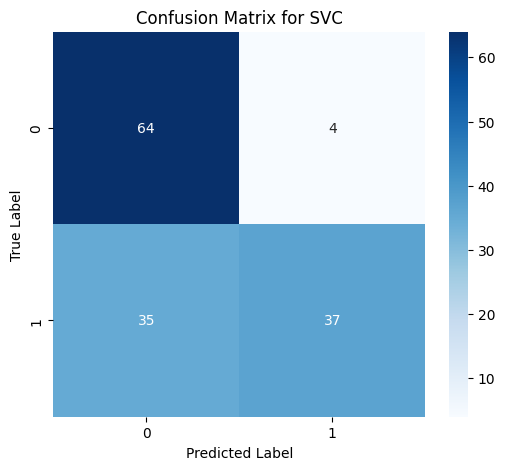

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Train the best model using the best kernel and C value
best_model = get_model(features, best_C, best_kernel)
best_model.fit(X_train, Y_train)

# Make predictions using the best model
y_best_pred = best_model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_best_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute the classification report
class_report = classification_report(Y_test, y_best_pred)
print("\nClassification Report:")
print(class_report)
# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, y_best_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVC')
plt.show()



#### **Confusion Matrix**:
- **True Positives (TP)**: 64 (Class 0 correctly predicted)
- **True Negatives (TN)**: 37 (Class 1 correctly predicted)
- **False Positives (FP)**: 35 (Class 1 incorrectly predicted as Class 0)
- **False Negatives (FN)**: 4 (Class 0 incorrectly predicted as Class 1)

#### **Classification Report**:
- **Class 0**:
  - **Precision**: 0.65 (65% of predicted Class 0 instances are correct)
  - **Recall**: 0.94 (94% of actual Class 0 instances are correctly predicted)
  - **F1-Score**: 0.77 (balanced measure of precision and recall)
- **Class 1**:
  - **Precision**: 0.90 (90% of predicted Class 1 instances are correct)
  - **Recall**: 0.51 (51% of actual Class 1 instances are correctly predicted)
  - **F1-Score**: 0.65 (balanced measure of precision and recall)
- **Overall Accuracy**: 0.72 (72% of all predictions are correct)


## Model 3: Support Vector Machine (SVM)

In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC

# Define categorical and numerical features
categorical_features = ['Absence_Reason', 'Absence_Month', 'Absence_Day', 'Seasons', 'Education', 'Drinker', 'Smoker']
numerical_features = ['Transportation_Expense', 'Work_Distance', 'Service_Time', 'Age', 'Average_Workload', 
                      'Hit_Target', 'Son', 'Pet', 'Weight', 'Height', 'BMI']

# Function to create an SVM pipeline with preprocessing
def get_model(features, C_value, kernel_type, svc_gamma):
    categorical_f = [f for f in features if f in categorical_features]
    numerical_f = [f for f in features if f in numerical_features]
    
    return make_pipeline(
        ColumnTransformer(transformers=[
            ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_f),
            ('numerical', StandardScaler(), numerical_f)
        ]),
        SVC(C=C_value, kernel=kernel_type, gamma=svc_gamma, random_state=42) 
    )

# Initialize cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

class Solution:
    def __init__(self, y):
        pred = np.ones(len(y))  # Default prediction (all 1s)
        self.accuracy = accuracy_score(y, pred) # Initialize with accuracy of predicting all 1s
        self.features = []  # Stores the best feature set

    def update(self, features, accuracy):
        if accuracy > self.accuracy:
            self.features = features.copy()
            self.accuracy = accuracy
            return True
        return False

# Feature selection: Initialize with all features and iteratively add the best features
all_features = categorical_features + numerical_features
current_features = []    # Start with no features selected
best = Solution(Y)  # Initialize solution with a "naive" prediction accuracy

while set(current_features) != set(all_features):
    selected_feature = None

    for feature in set(all_features) - set(current_features):
        new_features = current_features + [feature]

        # Train model and evaluate accuracy score using cross-validation
        model = get_model(new_features, 10, 'rbf', 'scale')  # Using RBF kernel and default gamma ('scale')
        accuracy_scores = cross_val_score(model, X_train[new_features], Y_train, cv=kfold, scoring='accuracy')
        avg_accuracy = np.mean(accuracy_scores)
        # If accuracy improves, update the solution with the new feature set
        if best.update(new_features, avg_accuracy):
            selected_feature = feature

    # Add the best selected feature to the current feature set       
    if selected_feature:
        current_features.append(selected_feature)
    else:
        break

print(f'\nSelected Features: {best.features}')
print(f'Best Accuracy: {best.accuracy:.4f}')

# Train final SVM on best features with hyperparameter tuning
features = best.features
results = {}

# Set hyperparameter values to test
kernels = ['rbf', 'poly']  # SVM kernels to evaluate
C_values = [0.1, 1, 10, 100]  # Values for the penalty parameter C
svc_gamma_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # Gamma values for RBF and polynomial kernels

for kernel in kernels:
    for C_value in C_values:
        for gamma in svc_gamma_values:
            
            model = get_model(features, C_value, kernel, gamma)
            
            # Perform cross-validation on the training set
            scores = cross_val_score(model, X_train[features], Y_train, cv=kfold, scoring='accuracy')
            results[(kernel, C_value, gamma)] = scores.mean()
            print(f'Model accuracy with kernel={kernel}, C={C_value}, gamma={gamma}: {scores.mean():.4f}')

# Find best hyperparameters
best_kernel, best_C, best_gamma = max(results, key=results.get)
print(f'\nBest combination: kernel={best_kernel}, C={best_C}, gamma={best_gamma} with accuracy: {results[(best_kernel, best_C, best_gamma)]:.4f}')

# Train final SVM model with best features & hyperparameters
final_model = get_model(features, C_value=best_C, kernel_type=best_kernel, svc_gamma=best_gamma)
final_model.fit(X_train[features], Y_train)

y_final_pred = final_model.predict(X_test[features])

final_accuracy = accuracy_score(Y_test, y_final_pred)
print(f'\nFinal Model Accuracy: {final_accuracy:.4f}')



Selected Features: ['Absence_Reason', 'Service_Time', 'Height']
Best Accuracy: 0.7266
Model accuracy with kernel=rbf, C=0.1, gamma=0.1: 0.6798
Model accuracy with kernel=rbf, C=0.1, gamma=0.2: 0.6816
Model accuracy with kernel=rbf, C=0.1, gamma=0.3: 0.6816
Model accuracy with kernel=rbf, C=0.1, gamma=0.4: 0.6816
Model accuracy with kernel=rbf, C=0.1, gamma=0.5: 0.6870
Model accuracy with kernel=rbf, C=0.1, gamma=0.6: 0.6978
Model accuracy with kernel=rbf, C=0.1, gamma=0.7: 0.6978
Model accuracy with kernel=rbf, C=0.1, gamma=0.8: 0.6906
Model accuracy with kernel=rbf, C=0.1, gamma=0.9: 0.6888
Model accuracy with kernel=rbf, C=1, gamma=0.1: 0.6870
Model accuracy with kernel=rbf, C=1, gamma=0.2: 0.6942
Model accuracy with kernel=rbf, C=1, gamma=0.3: 0.6978
Model accuracy with kernel=rbf, C=1, gamma=0.4: 0.6960
Model accuracy with kernel=rbf, C=1, gamma=0.5: 0.7014
Model accuracy with kernel=rbf, C=1, gamma=0.6: 0.7122
Model accuracy with kernel=rbf, C=1, gamma=0.7: 0.7176
Model accuracy 

#### Data Preprocessing:
  - The dataset contains both **categorical** (e.g., Absence_Reason, Education) and **numerical** (e.g., Transportation_Expense, Age) features.
  - Categorical features are transformed using **One-Hot Encoding** to convert them into a format suitable for machine learning models.
  - Numerical features are standardized using **StandardScaler** to ensure they have a mean of 0 and a standard deviation of 1, which is important for SVM models that are sensitive to feature scales.
  - A **pipeline** is created using make_pipeline to combine preprocessing steps and the SVM model. This ensures that all transformations are applied consistently during training and testing.

#### Feature Selection:
  - The code uses a **forward stepwise selection** algorithm to iteratively select the most important features.
  - Starting with an empty set of features, the algorithm adds one feature at a time and evaluates the model's performance using **5-fold cross-validation**.
  - The feature that results in the highest **accuracy** is added to the set of selected features.
  - This process continues until no further improvement in accuracy is observed or all features are included.
  - **K-Fold cross-validation** is used to assess model performance. The data is divided into 5 subsets (folds). The model is trained and validated 5 times, each time using a different fold as the validation set while the remaining folds serve as the training set.
  - The average accuracy across all folds is used to determine the performance of the feature set.
  - During feature selection, the **gamma** parameter is set to its default value (scale), and the **kernel** is set to rbf with a default C_value = 10 to avoid bias in the feature selection process.

#### Hyperparameter Tuning:
  - After selecting the best features, the code performs hyperparameter tuning for the SVM model.
  - It tests different values of the regularization parameter **C** (e.g., 0.1, 1, 10, 100) and the **gamma** parameter (e.g., 0.1, 0.2, ..., 0.9) for **non-linear kernels** (rbf and poly).
  - The model is cross validated on the train set for each combination of hyperparameters, and the accuracy is recorded.
  - The combination of hyperparameters (C, gamma, and kernel) that results in the highest accuracy is selected as the best configuration. In our case, the best configuration is **kernel = rbf**, **C_value = 10**, and **gamma = 0.6** with an accuracy of **0.7428**.

#### Final Model Training:
  - The final SVM model is trained using the **best feature set** and the **best hyperparameters** identified during the previous steps.
  - The model is then evaluated on the test set, and its accuracy is reported.
  - The final model's performance is measured using **accuracy**, which is the proportion of correctly predicted instances out of the total instances in the test set.



#### Confusion matrix and Classification report of SVM 

Confusion Matrix:
[[51 17]
 [15 57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        68
           1       0.77      0.79      0.78        72

    accuracy                           0.77       140
   macro avg       0.77      0.77      0.77       140
weighted avg       0.77      0.77      0.77       140



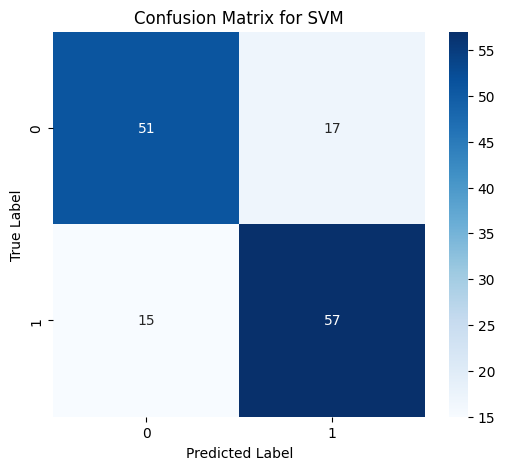

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Train the best model using the best kernel and C value
best_model = get_model(features, best_C, best_kernel, best_gamma)
best_model.fit(X_train, Y_train)

# Make predictions using the best model
y_best_pred = best_model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_best_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute the classification report
class_report = classification_report(Y_test, y_best_pred)
print("\nClassification Report:")
print(class_report)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, y_best_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()



#### **Confusion Matrix**:
- **True Positives (TP)**: 51 (Class 0 correctly predicted)
- **True Negatives (TN)**: 57 (Class 1 correctly predicted)
- **False Positives (FP)**: 15 (Class 1 incorrectly predicted as Class 0)
- **False Negatives (FN)**: 17 (Class 0 incorrectly predicted as Class 1)

#### **Classification Report**:
- **Class 0**:
  - **Precision**: 0.77 (77% of predicted Class 0 instances are correct)
  - **Recall**: 0.75 (75% of actual Class 0 instances are correctly predicted)
  - **F1-Score**: 0.76 (balanced measure of precision and recall)
- **Class 1**:
  - **Precision**: 0.77 (77% of predicted Class 1 instances are correct)
  - **Recall**: 0.79 (79% of actual Class 1 instances are correctly predicted)
  - **F1-Score**: 0.78 (balanced measure of precision and recall)
- **Overall Accuracy**: 0.77 (77% of all predictions are correct)

##  Conclusion

When evaluating the performance of different models like **Logistic Regression**, **Support Vector Classifier (SVC)**, and **Support Vector Machine (SVM)** on a binary classification task, the primary focus is on the **SVM model**, which demonstrates better performance compared to the other models. The evaluation metrics used include **accuracy**, **precision**, **recall**, and **F1-score**.

Here's a detailed outline of the evaluation metrics:

1. **Logistic Regression**:
   - **Accuracy**: 0.75 (75%)
   - **Class 0 Recall**: 91%
   - **Class 1 Recall**: 60%
   - **Analysis**:
     - The model performs well in identifying **Class 0** (high recall) but struggles with **Class 1** (low recall).
     - This results in a high number of **false positives**, which could be problematic if identifying Class 1 instances is critical.

2. **Support Vector Classifier (SVC) with Linear Kernel**:
   - **Accuracy**: 0.72 (72%)
   - **Class 0 Recall**: 94%
   - **Class 1 Recall**: 51%
   - **Analysis**:
     - Similar to Logistic Regression, the SVC model excels at identifying **Class 0** but struggles with **Class 1**.
     - The low recall for Class 1 indicates that the model misses many actual negative cases, which is a significant limitation.

3. **Support Vector Machine (SVM) with Polynomial Kernel**:
   - **Accuracy**: 0.77 (77%)
   - **Precision and Recall**:
     - **Class 0**: High precision and recall.
     - **Class 1**: Slightly higher recall than precision, indicating a more inclusive prediction for Class 1.
   - **Analysis**:
     - The SVM model achieves the highest accuracy among the three models, making correct predictions **77%** of the time.
     - While the model performs well overall, there is a slight trade-off between precision and recall for **Class 1**.

The **SVM model with rbf kernel** (kernel=rbf, C=10, gamma=0.6) outperforms both Logistic Regression and SVC, achieving an accuracy of **77%**.


##  Future Scope

**Model Enhancement and Optimization:**
1)	Hyperparameter Tuning: 
    - Explore more granular values for C and gamma. Using tools like GridSearchCV or RandomizedSearchCV can help find even better hyperparameters.
	- Consider other kernels like ‘sigmoid’ to see if they improve performance.

2)	Ensemble Methods: Combine SVM with other models like Random Forests or Gradient Boosting to improve predictive performance.

**Feature Engineering and Selection:**
1)	Interaction Features: Explore interaction terms between features to capture complex patterns E.g. Domain-Specific Interactions like combining 'Age' and 'Service Time' for seniority.

2)	Feature Importance Analysis: Use models like Random Forest or XGBoost to analyze feature importance. 

    - Model-Based Importance: Use models like Random Forest or XGBoost for feature importance.
    - Permutation Importance: Shuffles feature values and observes the effect on accuracy.

**Model Evaluation and Validation:**
1)	Cross-Validation: Perform k-fold cross-validation (more than 5 folds) to ensure the model's robustness and that accuracy isn't overestimated.

2)	Learning Curves and Validation Curves: 
    - Plot learning curves to understand if the model is underfitting or overfitting.
    - Use validation curves to see how accuracy changes with different values of C or gamma.
